In [1]:
#  Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

In [2]:
# Step 2: Load the Dataset
df = pd.read_csv("spam_ham_dataset.csv")

In [3]:
# Step 3: Basic Exploration
print("Shape of the dataset:", df.shape)
print("\nDataset preview:")
print(df.head())
print("\nMissing values:")
print(df.isnull().sum())

Shape of the dataset: (5171, 4)

Dataset preview:
   Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0  

Missing values:
Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64


In [7]:
#  Step 4: Data Cleaning and Preprocessing

# Drop rows with missing values (or alternatively fillna)
df.dropna(inplace=True)
# Display data types
print("\nData types:")
print(df.dtypes)

# Separate features and target
# Assume 'default' is the target column; update if different
target_col = 'label_num'  # <-- Change if needed
X = df.drop(columns=[target_col])
y = df[target_col]

# Convert categorical columns using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


Data types:
Unnamed: 0     int64
label         object
text          object
label_num      int64
dtype: object


In [8]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Train Models

# Initialize models
lr = LogisticRegression()
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

# Fit models
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)


--- Logistic Regression ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       742
           1       1.00      1.00      1.00       293

    accuracy                           1.00      1035
   macro avg       1.00      1.00      1.00      1035
weighted avg       1.00      1.00      1.00      1035



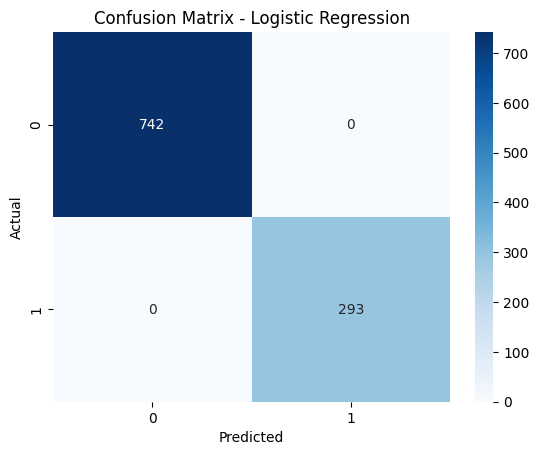


--- Decision Tree ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       742
           1       1.00      1.00      1.00       293

    accuracy                           1.00      1035
   macro avg       1.00      1.00      1.00      1035
weighted avg       1.00      1.00      1.00      1035



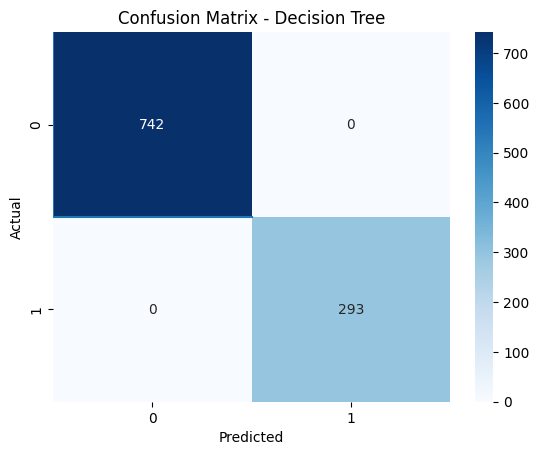


--- Random Forest ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       742
           1       1.00      1.00      1.00       293

    accuracy                           1.00      1035
   macro avg       1.00      1.00      1.00      1035
weighted avg       1.00      1.00      1.00      1035



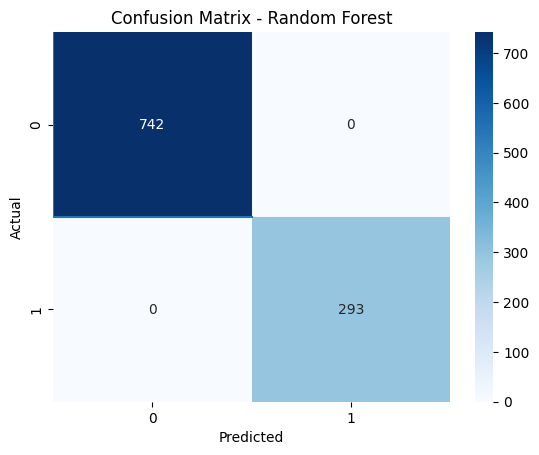

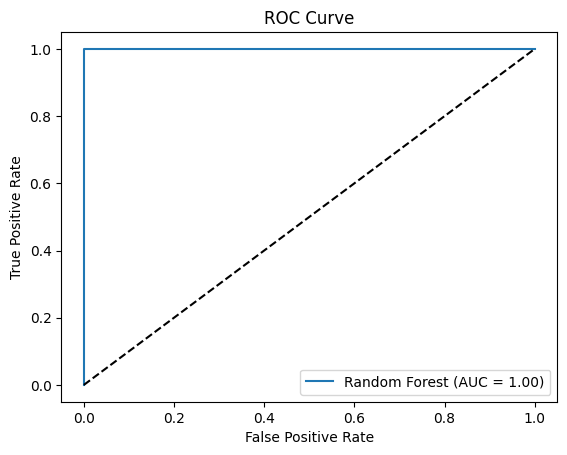

In [9]:
#  Step 7: Evaluate Models
models = {'Logistic Regression': lr, 'Decision Tree': dt, 'Random Forest': rf}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n--- {name} ---")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_scores)
        auc_score = roc_auc_score(y_test, y_scores)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [11]:
#  Step 8: Hyperparameter Tuning (Bonus)

param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)

print("\n Best Parameters for Decision Tree:", grid.best_params_)



 Best Parameters for Decision Tree: {'max_depth': 3, 'min_samples_split': 2}


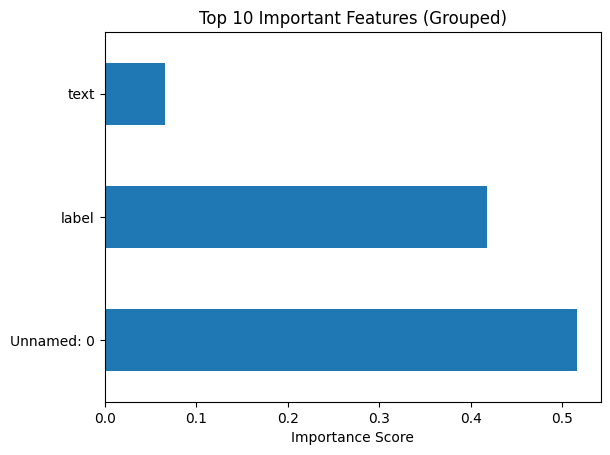

In [14]:
# Step 9: Feature Importance (Bonus)

importances = rf.feature_importances_
feat_importance = pd.Series(importances, index=X.columns)

# Group feature importances by original columns
grouped_importance = feat_importance.groupby(feat_importance.index.str.split('_').str[0]).sum()

# Plot grouped feature importances
grouped_importance.nlargest(10).plot(kind='barh', title="Top 10 Important Features (Grouped)")
plt.xlabel("Importance Score")
plt.show()